In [3]:
%matplotlib inline

In [4]:
import os
files = os.listdir('/bigdata/all_trips.parquet/')
import fastparquet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
len(files)

137

In [9]:
for f in files:
    d = fastparquet.ParquetFile(os.path.join('/bigdata/all_trips.parquet/', f))
    df = d.to_pandas(columns=['pickup_taxizone_id', 'pickup_datetime'])
    df = df[df.pickup_datetime < '2016-07-01']
    
    print("{} {}".format(f, df.shape[0]))
    
    if 'alldf' in locals():
        alldf = alldf.merge(df.groupby('pickup_taxizone_id').count()[['pickup_datetime']],
                           left_index=True, right_index=True, how='outer'
                           )
    else:
        alldf = df.groupby('pickup_taxizone_id').count()[['pickup_datetime']]

part.1175.parquet 0
part.1186.parquet 0
part.1185.parquet 0
part.57.parquet 1046251
part.1187.parquet 0
part.154.parquet 1047525
part.102.parquet 1046692
part.536.parquet 1536647
part.854.parquet 1063416
part.53.parquet 1046076
part.975.parquet 1044141
part.953.parquet 919854
part.649.parquet 1515670
part.1190.parquet 0
part.451.parquet 1065633
part.871.parquet 1062598
part.833.parquet 1126408
part.298.parquet 1044872
part.933.parquet 1059200
part.60.parquet 1046165
part.714.parquet 1127611
part.387.parquet 1039197
part.421.parquet 964766
part.1189.parquet 0
part.932.parquet 1059105
part.690.parquet 1150433
part.117.parquet 1046535
part.214.parquet 1044625
part.873.parquet 1062900
part.523.parquet 1145113
part.327.parquet 1047417
part.880.parquet 1062197
part.362.parquet 1044763
part.376.parquet 1043217
part.175.parquet 1045327
part.1188.parquet 0
part.279.parquet 1044917
part.332.parquet 1047064
part.1174.parquet 0
part.587.parquet 1119988
part.589.parquet 1130463
part.963.parquet 105

In [19]:
zz = pd.DataFrame(index=alldf.index,)
zz['N'] = np.nansum(alldf.values, axis=1)
zz['logN'] = np.log10(zz['N'])

/home/shekhar/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


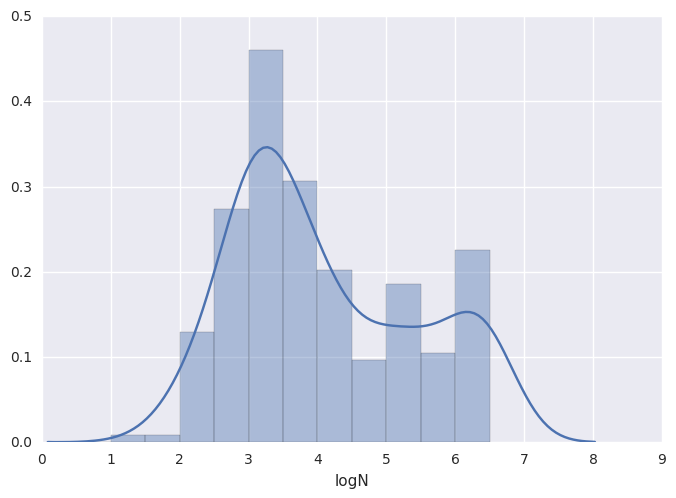

In [20]:
import seaborn
seaborn.distplot(zz.logN.fillna(0), bins=np.arange(0, 7., 0.5), norm_hist=True)
# plt.xticks(np.linspace(0, 8, 17));
# plt.xlabel("Log10(Taxi Trips)")
# plt.ylabel("Frequency")
# plt.gcf().set_size_inches(8, 4)

In [31]:
import geopandas as gpd
import matplotlib.pyplot as plt
tz = gpd.read_file('../shapefiles/taxi_zones.shp')
tz = tz.merge(zz, left_on='LocationID', right_index=True)

In [32]:
tz.N.sum()

116003744.0

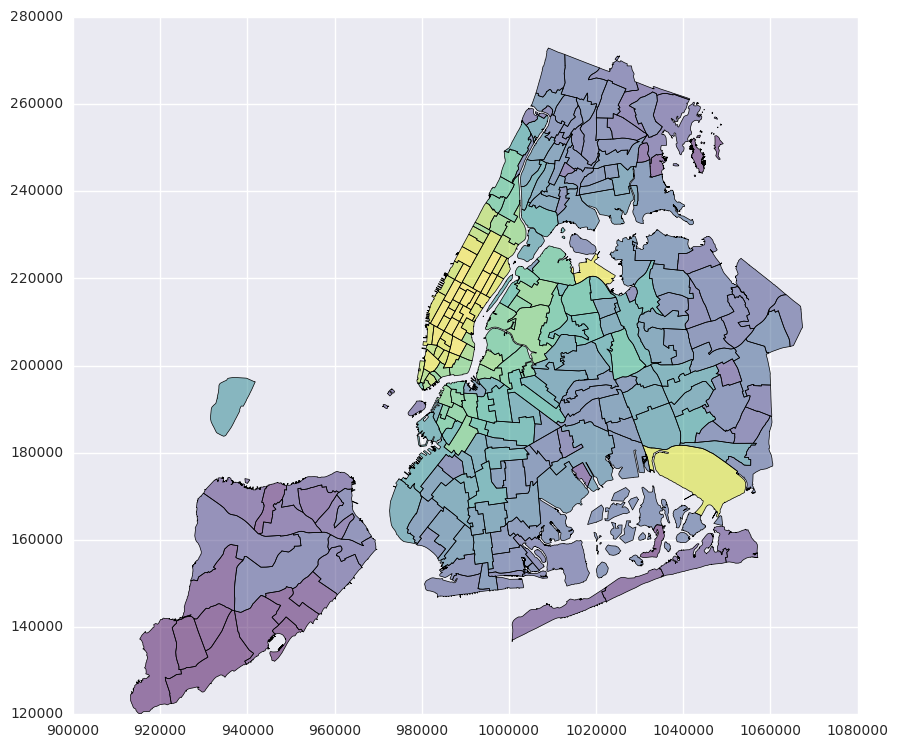

In [33]:
tz.plot(column='logN',  cmap=plt.cm.viridis, linewidth=0.5, vmin=2, vmax=6.5)
plt.gcf().set_size_inches(12, 9)

In [34]:
z = tz

In [35]:
z = z[(z.borough != 'Staten Island')]
z = z[(z.borough != 'EWR')]

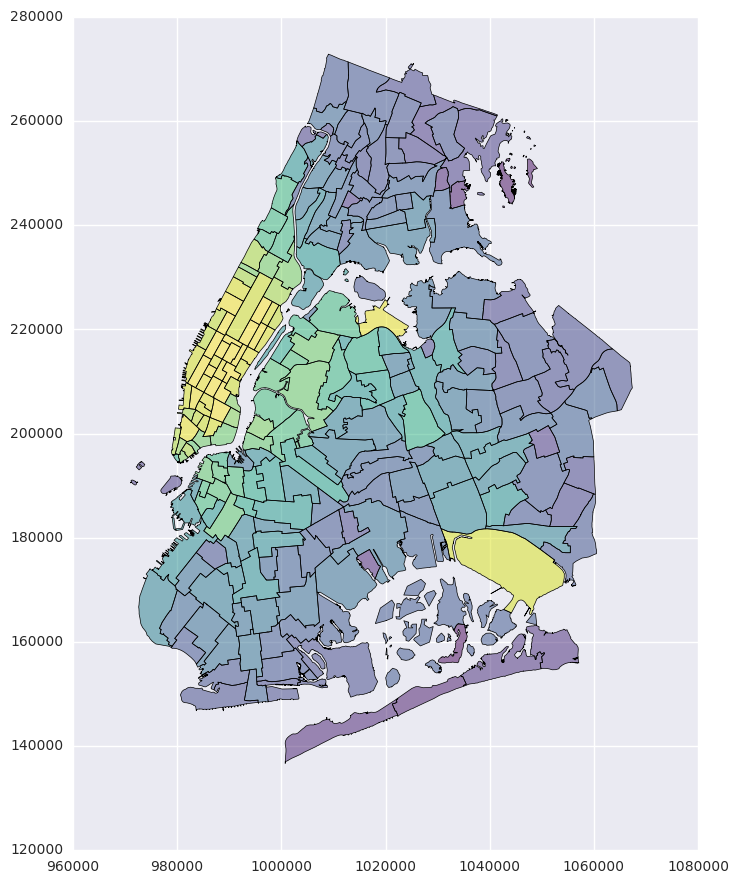

In [37]:
z.plot(column='logN',  cmap=plt.cm.viridis, linewidth=0.5, vmin=2, vmax=6.5)
plt.gcf().set_size_inches(12, 9)
plt.tight_layout()